In [2]:
import tensorflow as tf
import numpy as np
print(tf.version)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#show only digits 4 and 5 from the dataset
train_filter = np.where((y_train == 4 ) | (y_train == 5) | (y_train == 6) | (y_train == 7))
test_filter = np.where((y_test == 4) | (y_test == 5) | (y_test == 6) | (y_test == 7))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]


<module 'tensorflow._api.v1.version' from 'C:\\Users\\claud\\.conda\\envs\\tensorflow_env\\lib\\site-packages\\tensorflow\\_api\\v1\\version\\__init__.py'>


In [3]:
import matplotlib.pyplot as plt
image_index = 1190
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

6


In [4]:
x_train.shape

(23446, 28, 28)

In [6]:
x_test.shape

(3860, 28, 28)

In [216]:
# reducing the amount of data from the dataset
a = 4
x_train_2 = x_train[0:a,:,:]
y_train_2 = y_train[0:a]

In [217]:
x_train_2.shape
y_train_2.shape

(4,)

In [218]:
x_train = x_train_2
y_train = y_train_2
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (4, 28, 28, 1)
Number of images in x_train 4
Number of images in x_test 3860


In [219]:
x_test.shape

(3860, 28, 28, 1)

[0.00392157]
5


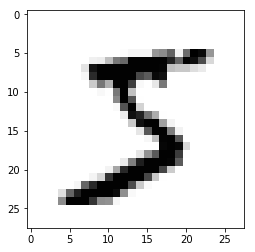

In [220]:
a = 0
x_test_temp = x_train[a,:,:,0]
x_test_temp.shape
#print(y_train[image_index])
plt.imshow(x_test_temp, cmap='Greys')
print (x_train[a,10,10,:])
print(y_train[a])

In [221]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [222]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 2s 551ms/step - loss: 2.2422 - acc: 0.2500
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 1.6572 - acc: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 1.1508 - acc: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 0.7157 - acc: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.4435 - acc: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.2340 - acc: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 6ms/step - loss: 0.1375 - acc: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 8ms/step - loss: 0.1001 - acc: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0989 - acc: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0512 - acc: 1.0000


In [223]:
model.evaluate(x_test, y_test)

3860/3860 [==============================] - 2s 444us/step


[4.040253898146239, 0.43808290155440416]

In [224]:
y_test[1800]

5

NameError: name 'img_rows' is not defined

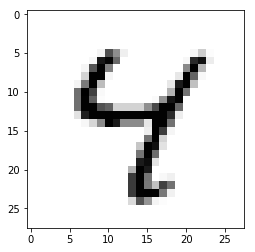

In [225]:
image_index = 2
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

In [226]:
model_json = model.to_json()
with open("model_4&5.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_4&5.h5")
print("Saved model to disk")

Saved model to disk


In [1]:
from keras.models import model_from_json
json_file = open('model_alldata.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_alldata.h5")
print("Loaded model from disk")
 
print(x_train.shape, y_train.shape)

ModuleNotFoundError: No module named 'keras'

In [260]:
loaded_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
loaded_model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 3s 741ms/step - loss: 1.0431e-06 - acc: 1.0000
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 6.9141e-06 - acc: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 8.3147e-06 - acc: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 1.4007e-06 - acc: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 8ms/step - loss: 2.4239e-04 - acc: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 1.6093e-06 - acc: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 9.5367e-07 - acc: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 9.8348e-07 - acc: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 9.8348e-07 - acc: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 7ms/step - loss: 9.5367e-07 - acc: 1.0000


In [261]:
loaded_model.evaluate(x_test, y_test)

3860/3860 [==============================] - 2s 555us/step


[8.477996500044906, 0.4170984455340884]